# TSNE with RobustScaler

#### This code template of simple TSNE(t-distributed stochastic neighbor embedding) in python is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets along with the RobustScaler as a feature rescaling technique.

### Required Packages

In [1]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder,RobustScaler
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [13]:
#filepath
file_path= ""

List of features which are  required for model training .

In [14]:
#x_values
features=[]

In [15]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [16]:
df = pd.read_csv(file_path)
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Disease
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [17]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [18]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [19]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: [1 2 3 4 5 6] to [0, 1, 2, 3, 4, 5]


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,Age_64,Age_65,Age_67,Age_68,Age_7,Age_70,Age_75,Age_8,Age_9,Age_?
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,2,1,2,3,1,3,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0
3,2,3,2,2,2,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Rescaling
Robust Scaler scales features that are robust to outliers.It uses the interquartile range which is between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).The median and scales of the data are removed by this scaling algorithm according to the quantile range. 

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) for the parameters

In [20]:
X_scaled = RobustScaler().fit_transform(X)
X_scaled=pd.DataFrame(data = X_scaled,columns = X.columns)
X_scaled.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,Age_64,Age_65,Age_67,Age_68,Age_7,Age_70,Age_75,Age_8,Age_9,Age_?
0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,-1.0,0.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.5,2.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for the parameters

In [84]:
X_embedded = TSNE(n_components=3,verbose=1,perplexity=40,n_iter=1000,random_state=24,learning_rate=45).fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 365 samples in 0.001s...
[t-SNE] Computed neighbors for 365 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 365 / 365
[t-SNE] Mean sigma: 1.697982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.434025
[t-SNE] KL divergence after 1000 iterations: 0.321086


#### Output Dataframe

In [86]:
finalDf = pd.DataFrame(data = X_embedded)
finalDf.columns=['comp1','comp2','comp3']
finalDf['Y']=Y
finalDf.head()

,comp1,comp2,comp3,Y
0,-4.445041,3.144459,4.579589,0
1,9.702360,9.470056,-4.950182,2
2,-7.512547,6.157599,9.375201,0
3,11.128432,7.950544,-6.740520,2
4,-3.940934,-1.121572,-1.013561,1


#### 3D Plots
Below are 3D plots of the data after dimensionality reduction

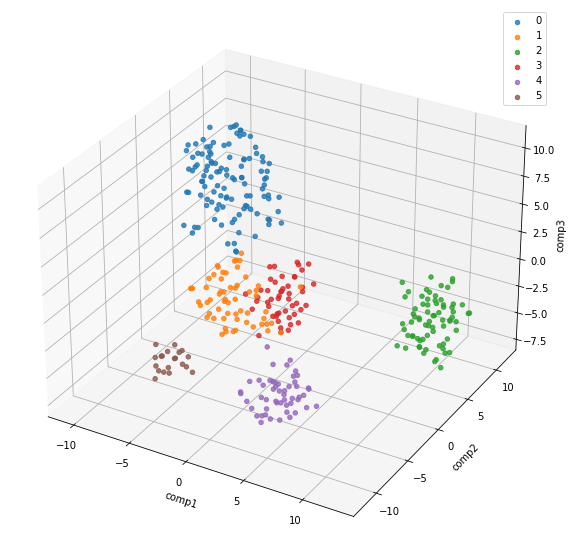

In [87]:
groups = finalDf.groupby("Y")
fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
for name,group in groups:
    ax.scatter3D(group['comp1'],group['comp2'],group['comp3'],alpha = 0.8,cmap=plt.cm.Accent,label=name)
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend()
plt.show()

In [77]:
fig2=px.scatter_3d(finalDf, x='comp1', y='comp2',z='comp3',color='Y')
fig2.show()

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)